# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task0 import Task0

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task0(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

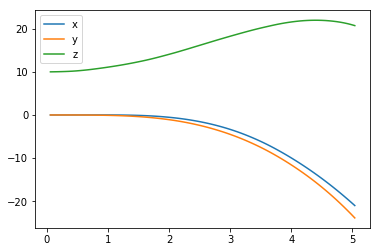

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

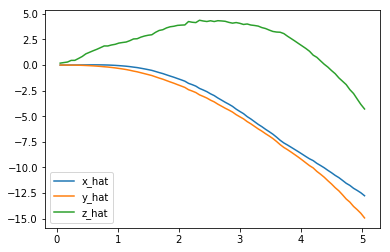

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

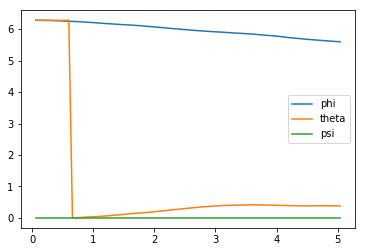

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

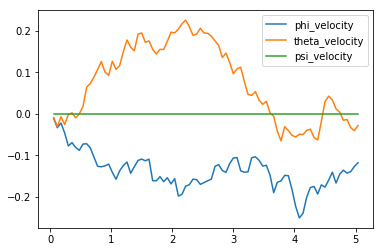

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

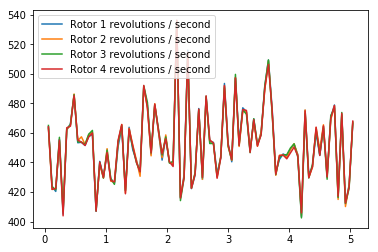

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[-21.00988931 -23.87928409  20.73251537   5.59903819   0.38140296
   0.        ]
[-12.75981037 -14.92581821  -4.28821792]
[-0.11805725 -0.02817711  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [9]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task0 import Task0

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task0(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score =  -2.739 (best =   0.103), noise_scale = 3.255

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

C:\Users\Eremey\Anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Episode =   10, score = -152.176 (best =  -0.427), z_final = 52.74131583934624, v_z_final = 13.0343536098706377

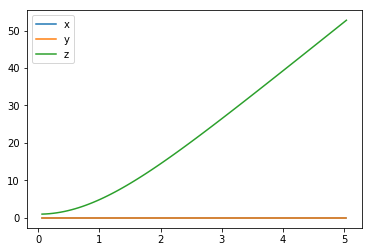

Episode =   20, score = -14.351 (best =  -0.427), z_final = 3.702859301497524, v_z_final = 0.689318638483126279

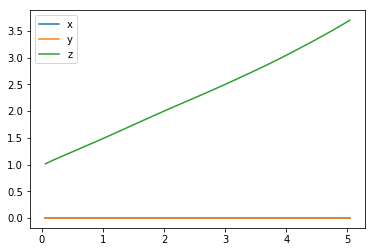

Episode =   30, score = -109.355 (best =  11.925), z_final = 0.0, v_z_final = -2.2983955375845206052617061686474

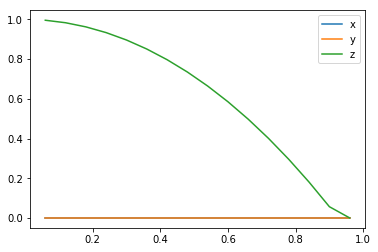

Episode =   40, score = -55.135 (best =  17.875), z_final = 28.930449210581454, v_z_final = 7.0142206960361714

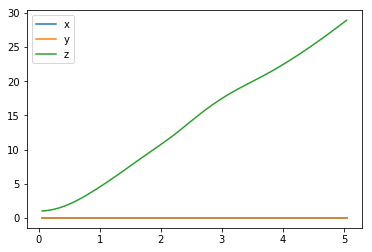

Episode =   50, score = -98.566 (best =  17.875), z_final = 38.95872507125781, v_z_final = 8.78156975949560347

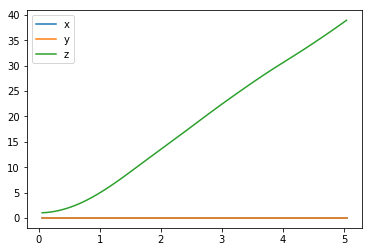

Episode =   60, score = -68.437 (best =  17.875), z_final = 31.717266584167344, v_z_final = 7.884031971131597

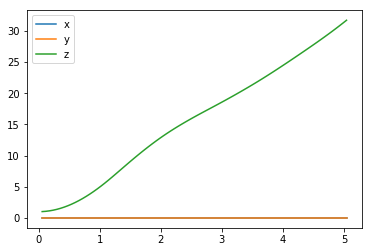

Episode =   70, score = -59.809 (best =  17.875), z_final = 30.704393416816334, v_z_final = 6.35710838907527355

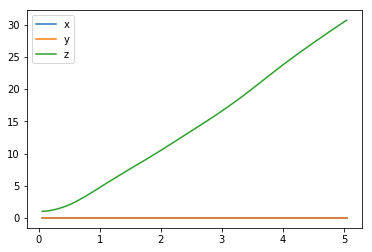

Episode =   80, score = -37.807 (best =  17.875), z_final = 23.627839741939777, v_z_final = 3.3440584067915655

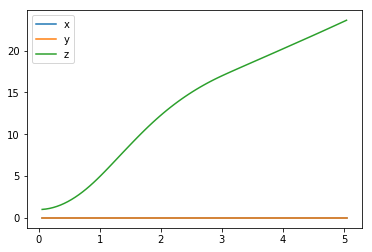

Episode =   90, score = -39.201 (best =  17.875), z_final = 23.09905749730416, v_z_final = 1.13178352513825097

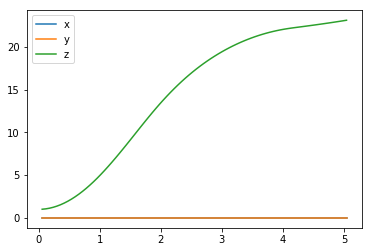

Episode =  100, score = -36.875 (best =  17.875), z_final = 22.554147546101703, v_z_final = -0.01127773125137621

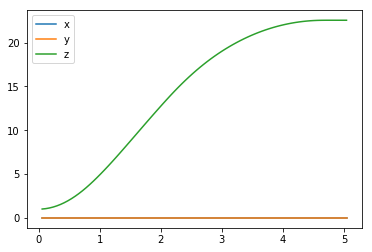

Episode =  110, score =  -2.770 (best =  26.854), z_final = 19.52925470888182, v_z_final = 4.0998787357061826826

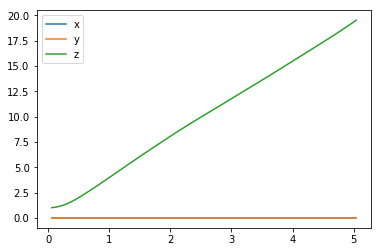

Episode =  120, score =  -8.690 (best =  33.661), z_final = 16.287944378753334, v_z_final = 0.23250408383646481

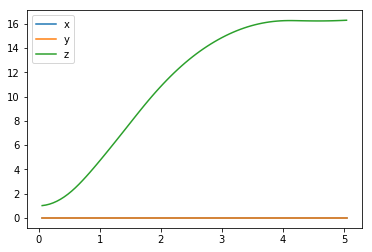

Episode =  130, score = -28.798 (best =  33.661), z_final = 21.293902638828634, v_z_final = 1.564383493451980257

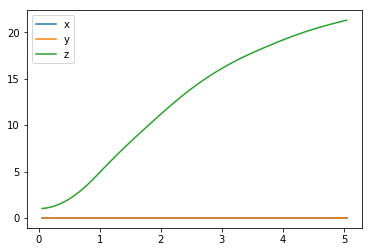

Episode =  140, score = -37.980 (best =  40.199), z_final = 0.8255041438070317, v_z_final = 0.014354536633432021

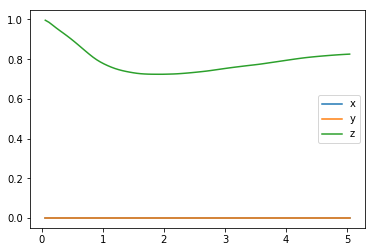

Episode =  150, score = -75.587 (best =  40.199), z_final = 0.0, v_z_final = -0.430625994436367865312920167586723

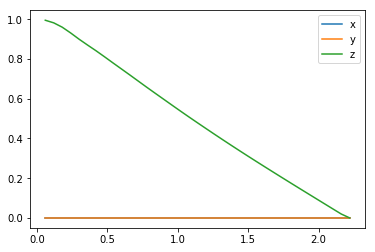

Episode =  160, score = -24.915 (best =  40.199), z_final = 1.0953382082391758, v_z_final = 0.017846339169445086

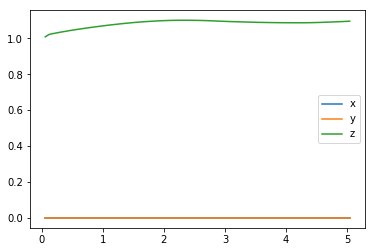

Episode =  170, score = -16.357 (best =  40.199), z_final = 2.495067624718114, v_z_final = 0.50222250197094454516

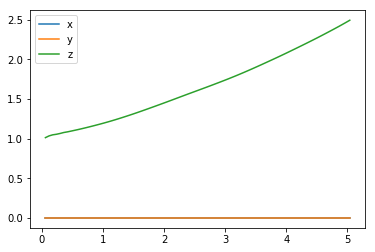

Episode =  180, score =  18.840 (best =  40.199), z_final = 12.5919110647559, v_z_final = 2.653303952994115493

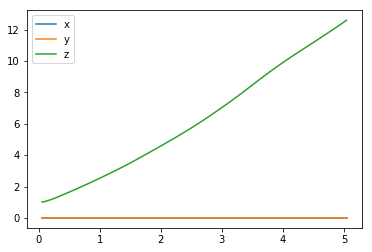

Episode =  190, score =  -2.924 (best =  40.199), z_final = 18.39997866749572, v_z_final = 0.329020447694181936

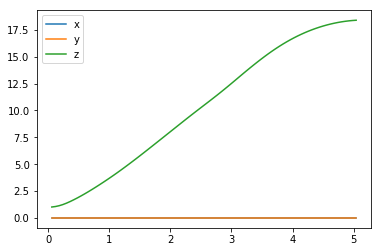

Episode =  200, score =  -5.118 (best =  40.199), z_final = 15.663228870055145, v_z_final = -0.67619011589275522

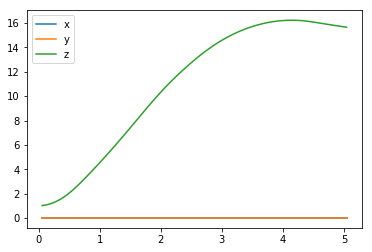

Episode =  210, score =   5.917 (best =  40.199), z_final = 18.004683740582067, v_z_final = 2.5371875448952452096

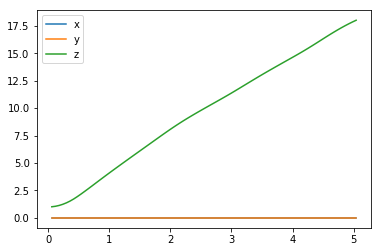

Episode =  220, score =  19.989 (best =  40.199), z_final = 15.24174586535387, v_z_final = 2.17194846187494054

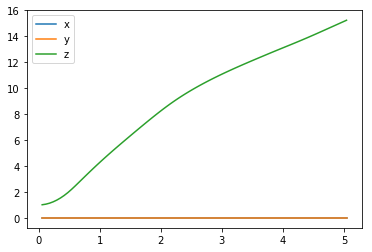

Episode =  230, score =  14.530 (best =  41.999), z_final = 15.54394140361623, v_z_final = 1.84109106417663747

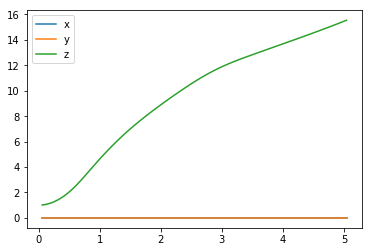

Episode =  240, score =  24.401 (best =  42.209), z_final = 14.74454967556359, v_z_final = 1.71619730700902802

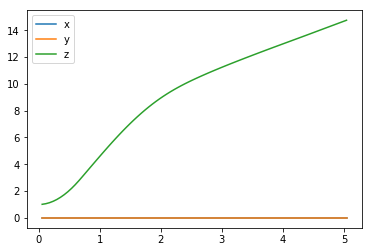

Episode =  250, score =  11.127 (best =  42.209), z_final = 15.49570403271278, v_z_final = 1.41606517690356137

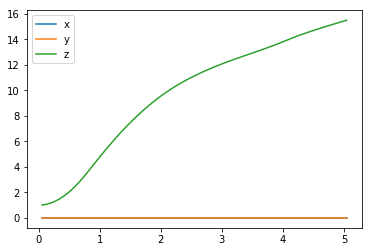

Episode =  260, score =  24.662 (best =  42.209), z_final = 14.382528354608016, v_z_final = 1.5150876268946984

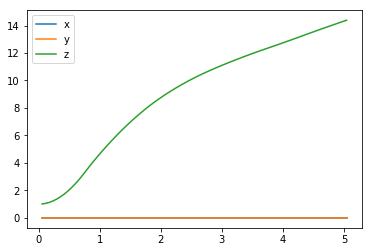

Episode =  270, score =  18.526 (best =  42.209), z_final = 14.870254220404028, v_z_final = 1.6133861454569518

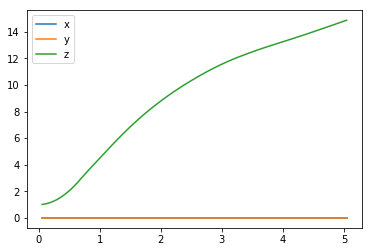

Episode =  280, score =   8.804 (best =  42.209), z_final = 16.225266516474722, v_z_final = 1.6380829530347815

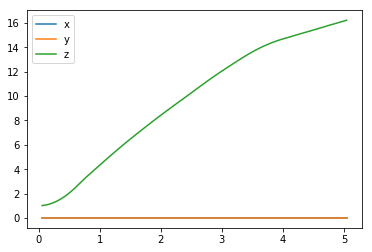

Episode =  290, score =   6.863 (best =  42.209), z_final = 15.962203411020493, v_z_final = 1.0926443404736235

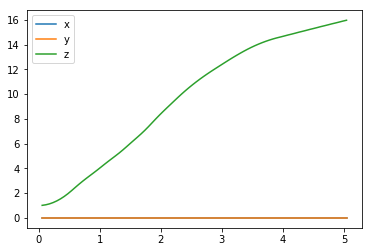

Episode =  300, score =   6.555 (best =  42.209), z_final = 16.43542905592256, v_z_final = 1.53756263700401528

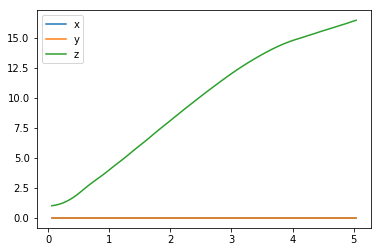

Episode =  310, score =   9.299 (best =  42.209), z_final = 16.274816068547775, v_z_final = 1.5597001679227518

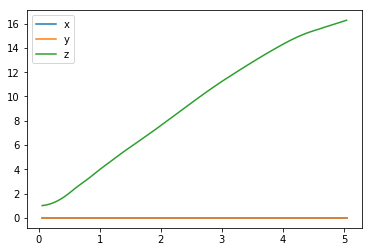

Episode =  320, score =  37.328 (best =  42.209), z_final = 11.116480118525445, v_z_final = 1.1703482202998592

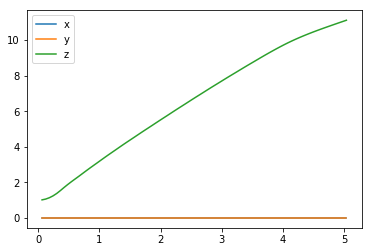

Episode =  330, score =  -8.991 (best =  42.209), z_final = 6.953433195741811, v_z_final = 1.11422364793618382

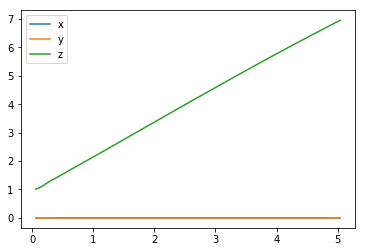

Episode =  340, score = -12.387 (best =  42.209), z_final = 4.83189826149774, v_z_final = 0.7341710356828341804

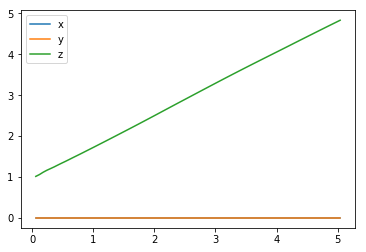

Episode =  350, score = -14.070 (best =  42.209), z_final = 4.045079826100897, v_z_final = 0.781411878621216664

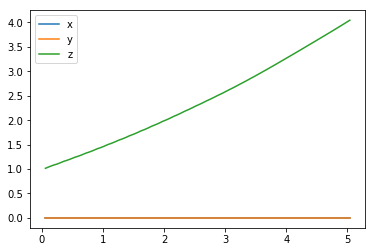

Episode =  360, score = -14.228 (best =  42.209), z_final = 3.6875199881918856, v_z_final = 0.59984002509808616

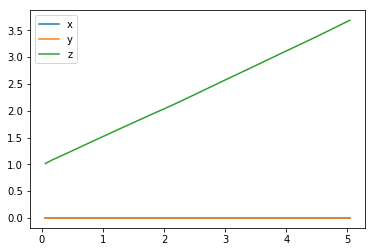

Episode =  370, score = -87.836 (best =  42.209), z_final = 0.0, v_z_final = -0.6536287189562574430398622332715

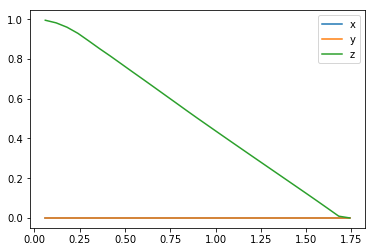

Episode =  380, score = -70.782 (best =  42.209), z_final = 0.0, v_z_final = -0.41969127985328325

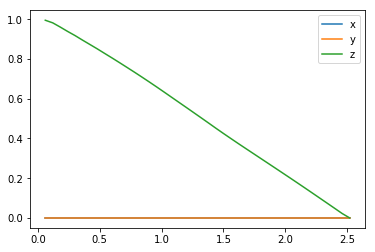

Episode =  390, score = -17.416 (best =  42.209), z_final = 2.0252763137397007, v_z_final = 0.159913914706400126

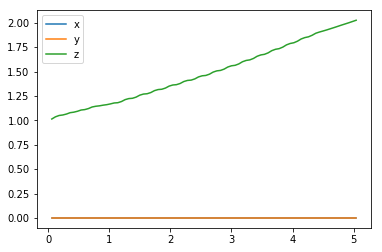

Episode =  400, score = -14.951 (best =  42.209), z_final = 3.248866279647607, v_z_final = 0.48525878344193294053

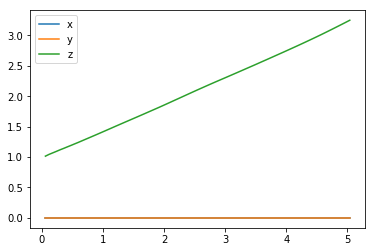

Episode =  410, score = -14.782 (best =  42.209), z_final = 3.4339101048454777, v_z_final = 0.4924180778310683

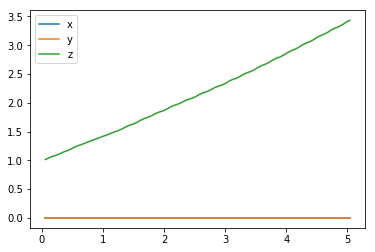

Episode =  420, score = -13.080 (best =  42.209), z_final = 4.422168878546579, v_z_final = 0.8304644331787971

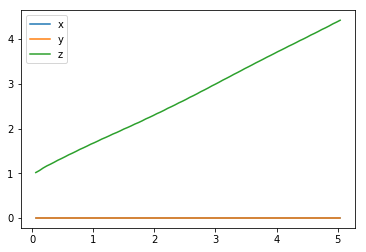

Episode =  430, score = -12.938 (best =  42.209), z_final = 4.261877956275684, v_z_final = 0.6690463495698288

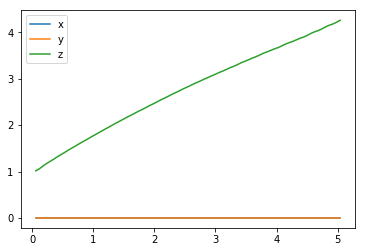

Episode =  440, score = -12.284 (best =  42.209), z_final = 4.5430345485484995, v_z_final = 0.4218473997670181

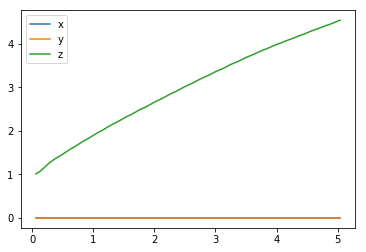

Episode =  450, score = -12.271 (best =  42.209), z_final = 4.388712226447321, v_z_final = 0.469095172618335176

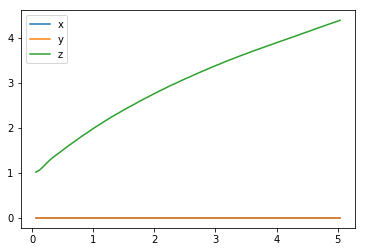

Episode =  460, score =  -8.325 (best =  42.209), z_final = 6.692392844555381, v_z_final = 0.718229918592436537

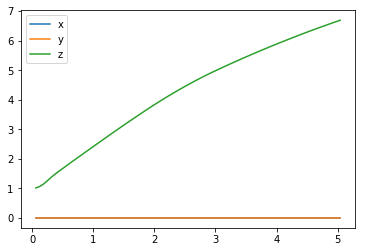

Episode =  470, score = -10.138 (best =  42.209), z_final = 5.843865070736888, v_z_final = 0.7633925971900827

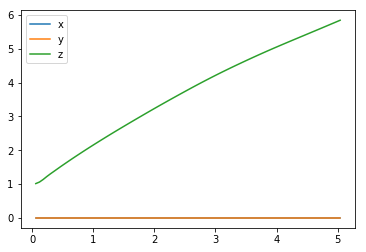

Episode =  480, score =  -6.195 (best =  42.209), z_final = 8.644628982742633, v_z_final = 1.3390737186024337

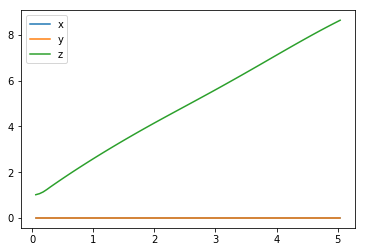

Episode =  490, score =   3.393 (best =  42.209), z_final = 9.22423797993812, v_z_final = 0.99354625269923543

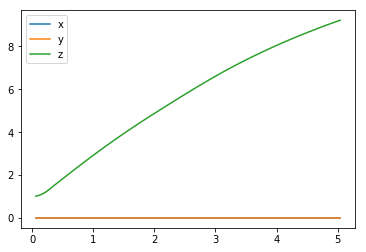

Episode =  500, score =  -5.119 (best =  42.209), z_final = 8.275683016432168, v_z_final = 0.8418765420690332

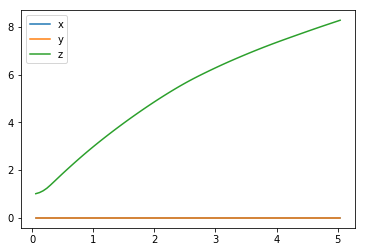

Episode =  510, score =  18.229 (best =  69.058), z_final = 9.659565001053368, v_z_final = 0.97555508318150359

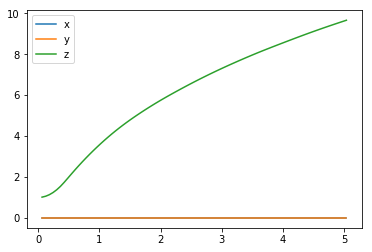

Episode =  520, score =  59.673 (best =  83.069), z_final = 11.505522592318705, v_z_final = 0.6862022054140389

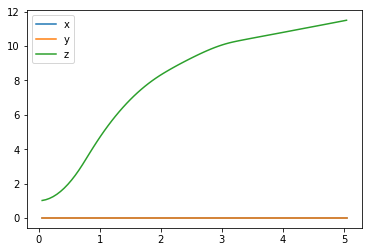

Episode =  530, score =  -2.682 (best =  83.069), z_final = 6.826129205472031, v_z_final = 0.219205792118465144

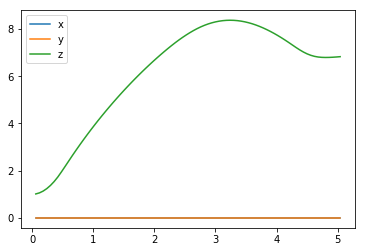

Episode =  540, score =  -4.924 (best =  83.069), z_final = 5.849884041927285, v_z_final = -0.3319225124409849

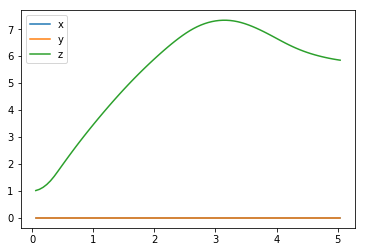

Episode =  550, score =  22.562 (best =  88.145), z_final = 11.624570396494214, v_z_final = -0.63565478004904277

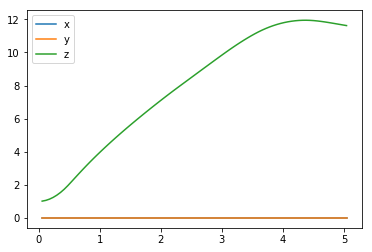

Episode =  560, score =  24.852 (best =  88.145), z_final = 13.562961618566874, v_z_final = 1.379212095090139414

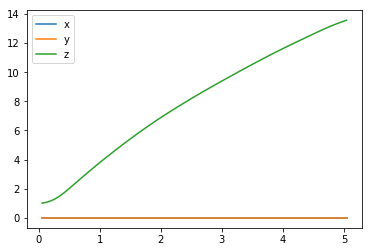

Episode =  570, score =  22.493 (best =  88.145), z_final = 13.921319718193596, v_z_final = 1.3913863622417961

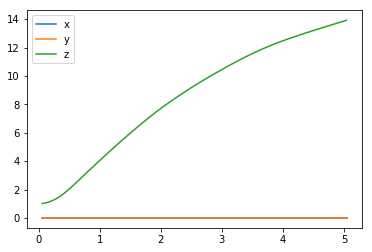

Episode =  580, score =  28.914 (best =  88.145), z_final = 12.89796685403015, v_z_final = 1.275072039812865626

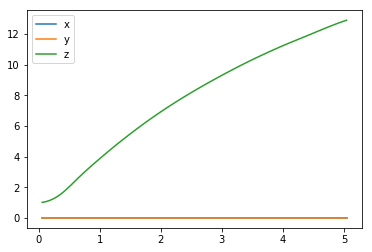

Episode =  590, score =  27.891 (best =  88.145), z_final = 13.476240459293672, v_z_final = 1.6288641284128722

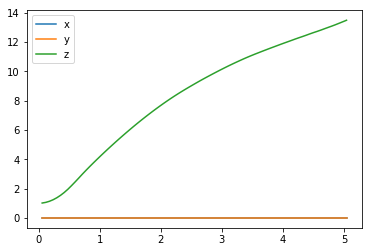

Episode =  600, score =  21.156 (best =  88.145), z_final = 14.936398537011211, v_z_final = 1.4272759626661147

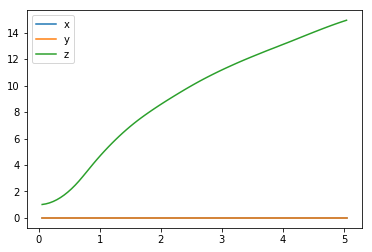

Episode =  610, score =  24.403 (best =  88.145), z_final = 14.522204041190761, v_z_final = 1.9815027839264352

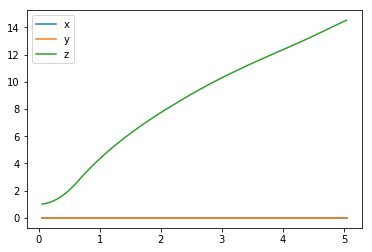

Episode =  620, score =  25.108 (best =  88.145), z_final = 13.792218883283436, v_z_final = 1.3598561434432737

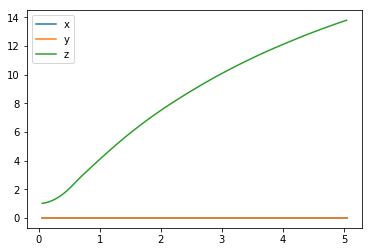

Episode =  630, score =  26.553 (best =  88.145), z_final = 13.651016928930236, v_z_final = 1.4260215846536182

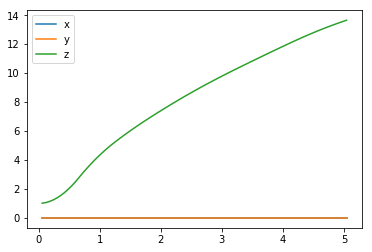

Episode =  640, score =  26.591 (best =  88.145), z_final = 13.602321757324368, v_z_final = 1.4121560587716795

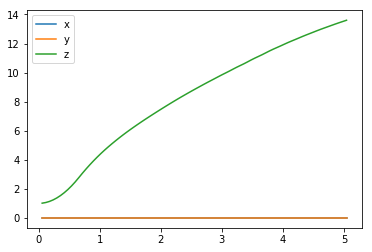

Episode =  650, score =  23.122 (best =  88.145), z_final = 14.350420053165706, v_z_final = 1.5114786210660877

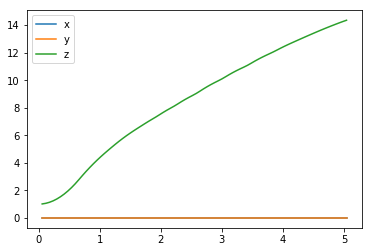

Episode =  660, score =  22.498 (best =  88.145), z_final = 13.55953090898442, v_z_final = 0.75512812318406859

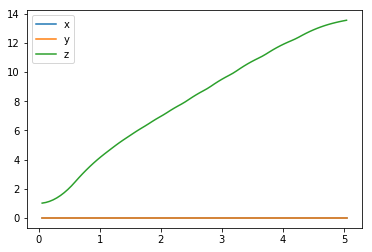

Episode =  670, score =  35.884 (best =  88.145), z_final = 11.888067077523266, v_z_final = -0.69423337622491383

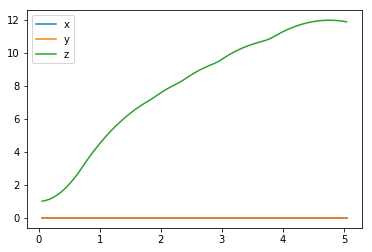

Episode =  680, score =  -2.651 (best =  88.145), z_final = 8.188063932622768, v_z_final = 0.044286224686849773

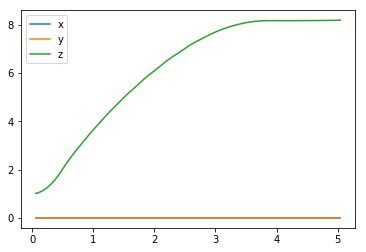

Episode =  690, score =  69.940 (best =  88.145), z_final = 9.04587929230829, v_z_final = -0.2116508064067574445

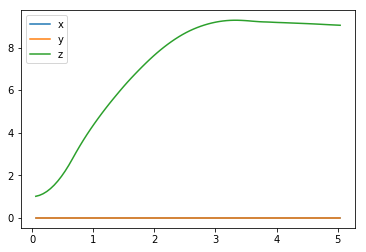

Episode =  700, score =  -3.056 (best =  88.145), z_final = 6.90914534915213, v_z_final = 0.9116940137782863644

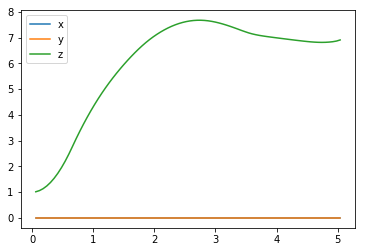

Episode =  710, score =  80.140 (best =  88.145), z_final = 11.03445162396668, v_z_final = 0.78556503911121028

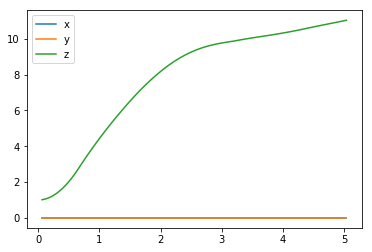

Episode =  720, score =  64.202 (best =  88.145), z_final = 10.775881958398989, v_z_final = 0.58166671582951913

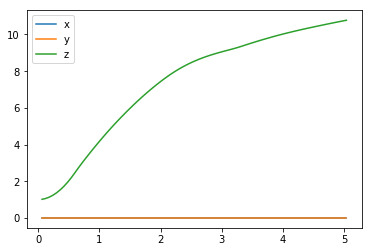

Episode =  730, score =  34.400 (best =  88.145), z_final = 9.88294061082698, v_z_final = 0.7278294737885090856

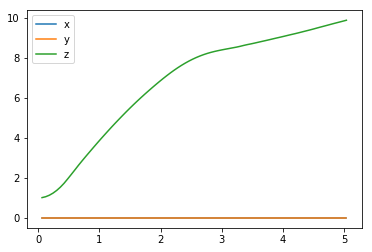

Episode =  740, score =  31.184 (best =  88.145), z_final = 12.617017590837014, v_z_final = 0.71012786302877065

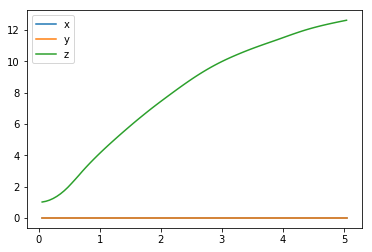

Episode =  750, score =  28.532 (best =  88.145), z_final = 13.41810669762101, v_z_final = 1.17637056281270784

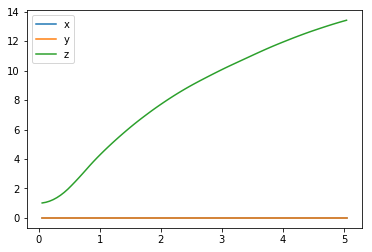

Episode =  760, score =  49.069 (best =  88.145), z_final = 11.72432591868297, v_z_final = 0.414590226067609775

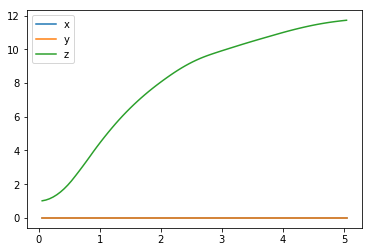

Episode =  770, score =  34.291 (best =  88.145), z_final = 9.520300465217616, v_z_final = 0.398287649651407755

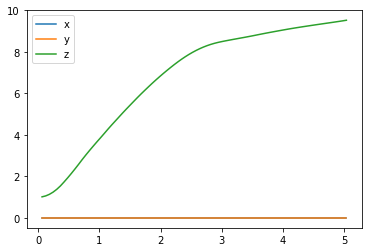

Episode =  780, score =  32.782 (best =  88.145), z_final = 9.47081156963107, v_z_final = 0.3058576240076732553

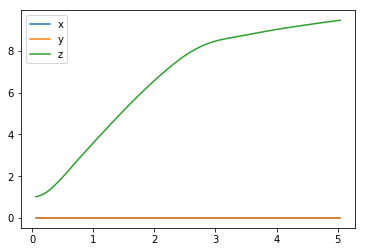

Episode =  790, score =  73.296 (best =  88.145), z_final = 10.31861009560623, v_z_final = -0.56532986804095336

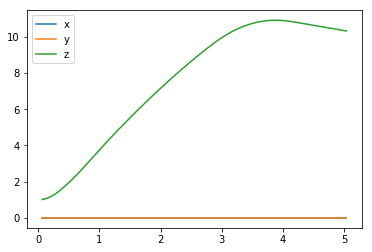

Episode =  800, score =  22.209 (best =  88.145), z_final = 8.528542257801153, v_z_final = -0.0021271534159213804

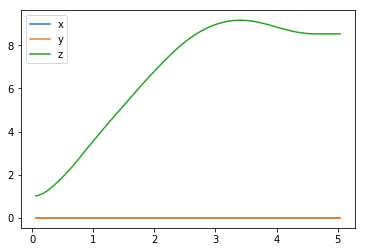

Episode =  810, score =   5.141 (best =  88.145), z_final = 9.031884185648465, v_z_final = 0.146955682328424074

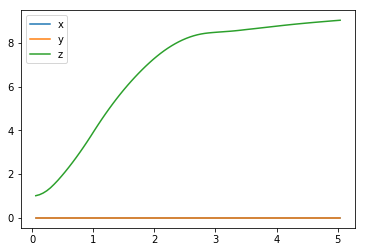

Episode =  820, score =  -1.832 (best =  88.145), z_final = 8.764657411939949, v_z_final = 0.2995372002577980617

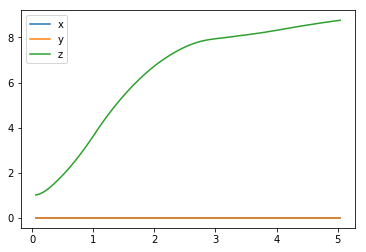

Episode =  830, score =  74.241 (best =  89.627), z_final = 9.712290335441093, v_z_final = 0.1237263798623095806

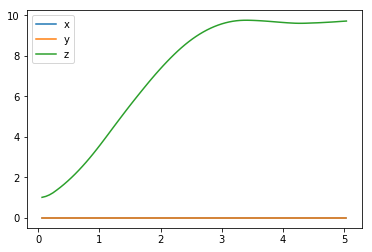

Episode =  840, score =  56.567 (best =  89.627), z_final = 9.605696843624187, v_z_final = 0.1848558071641856549

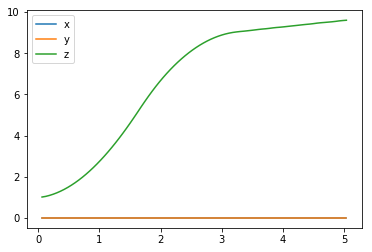

Episode =  850, score =  30.361 (best =  89.627), z_final = 9.342618984028917, v_z_final = 0.22060310525319951136

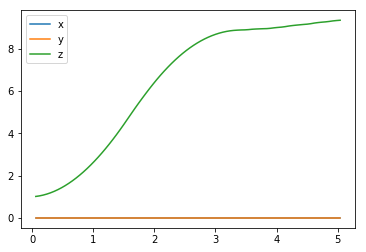

Episode =  860, score =  56.593 (best =  89.627), z_final = 9.97592404133975, v_z_final = 0.4262280762552898973

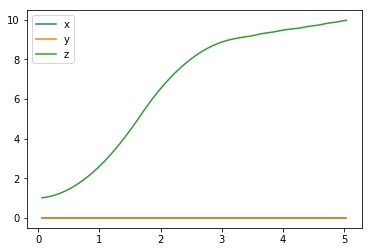

Episode =  870, score =  66.698 (best =  89.627), z_final = 10.448861280138045, v_z_final = 0.47260869256199894

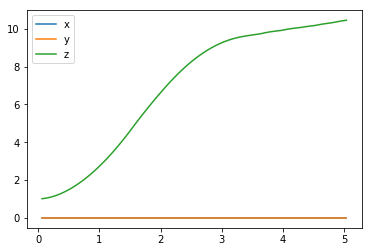

Episode =  880, score =  62.827 (best =  89.627), z_final = 10.268140304286835, v_z_final = 0.4047183544805955

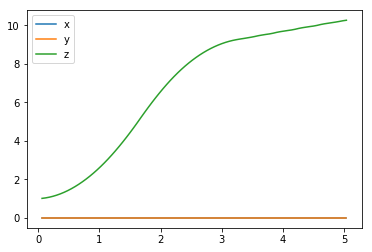

Episode =  890, score =  33.824 (best =  89.627), z_final = 9.621150049927913, v_z_final = 0.333556889246705354

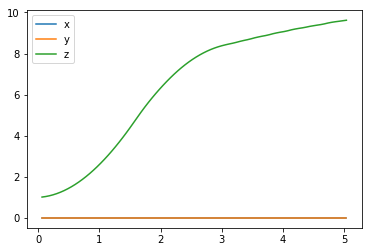

Episode =  900, score =  52.405 (best =  89.627), z_final = 11.46473698914156, v_z_final = 1.172091367810665773

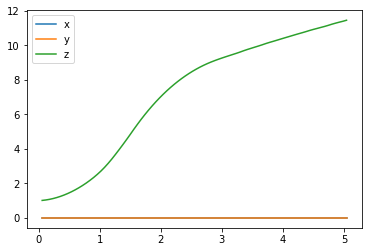

Episode =  910, score =  57.626 (best =  89.627), z_final = 10.970323991355398, v_z_final = 1.1161507792911554

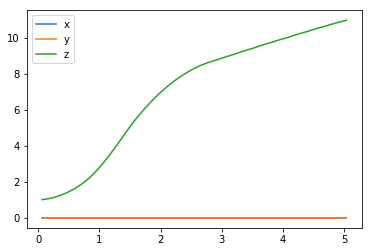

Episode =  920, score =  52.065 (best =  89.627), z_final = 11.178893731729003, v_z_final = 0.8290272767080921

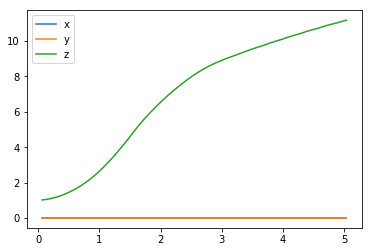

Episode =  930, score =  63.358 (best =  89.627), z_final = 10.672834351903981, v_z_final = 0.6069078583490479

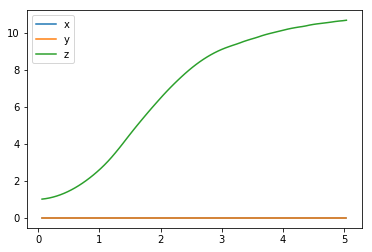

Episode =  940, score =  53.204 (best =  89.627), z_final = 10.505772580544747, v_z_final = 0.8302520135665874

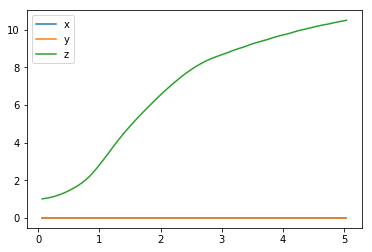

Episode =  950, score =  38.093 (best =  89.627), z_final = 10.387834366569937, v_z_final = 1.0930966854283786

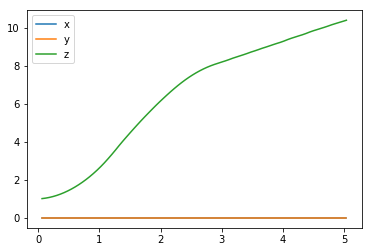

Episode =  960, score =  50.143 (best =  89.627), z_final = 11.58076733611822, v_z_final = 1.22791521621034338

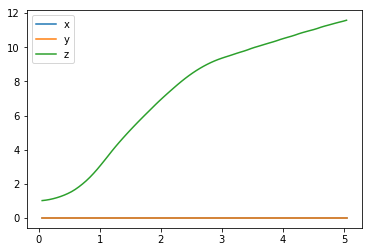

Episode =  970, score =  45.456 (best =  89.627), z_final = 11.885984046505758, v_z_final = 0.8423714531459698

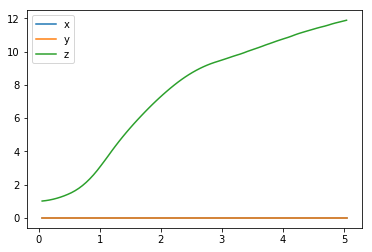

Episode =  980, score =  53.376 (best =  89.627), z_final = 10.978986279647886, v_z_final = 1.2664915697380636

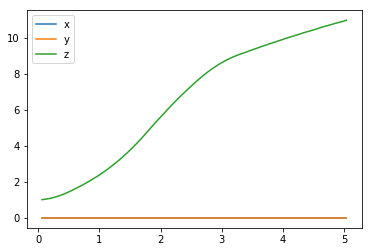

Episode =  990, score =  37.640 (best =  89.627), z_final = 10.14063807807227, v_z_final = 1.08166812516498649

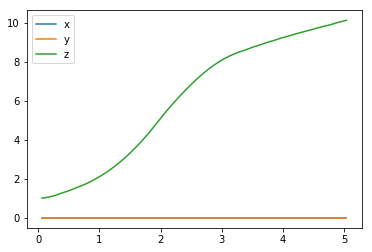

Episode = 1000, score =  49.357 (best =  89.627), z_final = 11.127972673408168, v_z_final = 0.8383112765461587

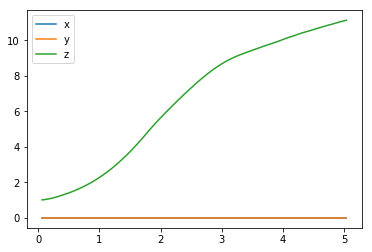

Episode = 1010, score =  36.956 (best =  89.627), z_final = 10.438478794479344, v_z_final = 1.0680661376820997

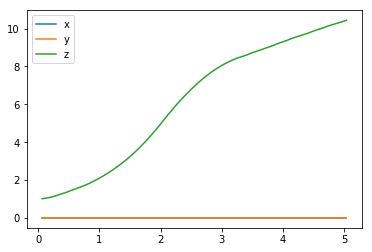

KeyboardInterrupt: 

In [10]:
import sys
import pandas as pd
from agents.agent import DDPG
#from agents.agent2 import PolicyGradient
from task import Task
import matplotlib.pyplot as plt
%matplotlib inline

num_episodes = 2100
init_pos = np.array([0.0, 0.0, 1.0, 0.0, 0.0, 0.0])
target_pos = np.array([0., 0., 10.])
task = Task(init_pose=init_pos, target_pos=target_pos)
agent = DDPG(task) 
#agent = PolicyGradient(task)
scores_labels = ['episode','score','best_score','z_final']
scores = {x : [] for x in scores_labels}
file_output = 'scores.txt'

labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_z_action']
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    for i_episode in range(1, num_episodes+1):
        state = agent.reset_episode() # start a new episode
        results = {x : [] for x in labels}
        while True:
            action = agent.act(state) 
            next_state, reward, done = task.step(action)
            agent.step(action, reward, next_state, done)
            state = next_state
            to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(action)
            for ii in range(len(labels)):
                results[labels[ii]].append(to_write[ii])
            to_write = [i_episode, agent.score, agent.best_score, task.sim.pose[2]]
            for ii in range(len(scores_labels)):
                scores[scores_labels[ii]].append(to_write[ii])
            writer.writerow(to_write)
            if done:
                print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), z_final = {}, v_z_final = {}".format(
                    i_episode, agent.score, agent.best_score, task.sim.pose[2], task.sim.v[2]), end="")  # [debug]
                if i_episode%10==0:
                    plt.plot(results['time'], results['x'], label='x')
                    plt.plot(results['time'], results['y'], label='y')
                    plt.plot(results['time'], results['z'], label='z')
                    plt.legend()
                    plt.ylim()
                    plt.show()
                break
        sys.stdout.flush()
    
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_z_action']
results = {x : [] for x in labels}
state = agent.reset_episode()
while True:
    action = agent.act(state) 
    next_state, reward, done = task.step(action)
    agent.step(action, reward, next_state, done)
    to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(action)
    for ii in range(len(labels)):
        results[labels[ii]].append(to_write[ii])
    state = next_state
    #print("state", state[-12:-6])
    if done:
        break
sys.stdout.flush()

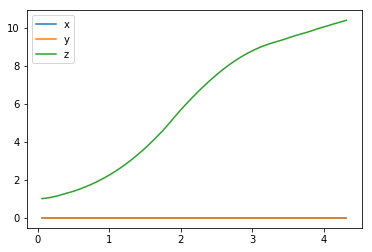

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

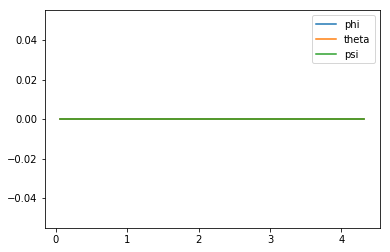

In [12]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

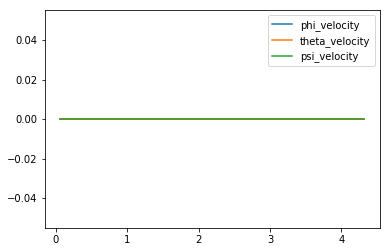

In [13]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

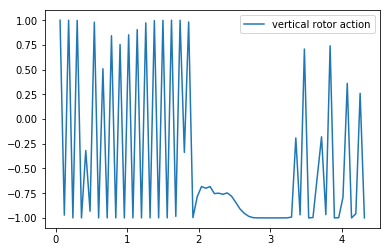

In [16]:
plt.plot(results['time'], results['rotor_z_action'], label='vertical rotor action')
#plt.plot(results['time'], results['rotor_x_action'], label='Rotor 2 revolutions / second')
#plt.plot(results['time'], results['rotor_y_action'], label='Rotor 3 revolutions / second')
plt.legend()
_ = plt.ylim()

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

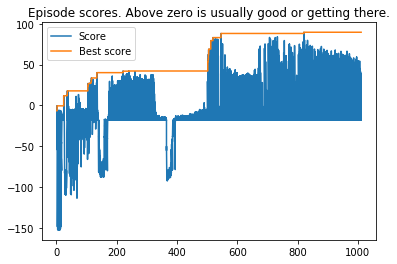

In [40]:
plt.plot(scores['episode'], scores['score'], label='Score')
plt.plot(scores['episode'], scores['best_score'], label='Best score')
plt.title('Episode scores. Above zero is usually good or getting there.')
plt.legend()
_ = plt.ylim()

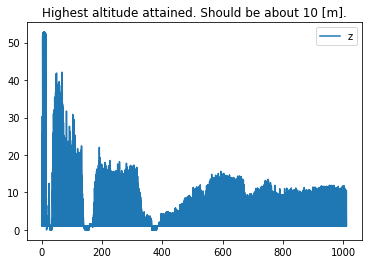

In [39]:
plt.plot(scores['episode'], scores['z_final'], label='z')
plt.title('Highest altitude attained. Should be about 10 [m].')
plt.legend()
_ = plt.ylim()

In [38]:
last_episode = max(scores['episode'])
def scores_in_episode(scores, episode):
    episode_idx = np.argwhere(np.array(scores['episode'])==episode).flatten()
    ii = episode_idx[-1]
    return [scores['episode'][ii],scores['score'][ii],scores['best_score'][ii],scores['z_final'][ii]]
last_10_score = 0
last_10_z_final = 0
for i in range(last_episode-9,last_episode+1):
    episode_scores = scores_in_episode(scores, i)
    last_10_score += episode_scores[1]
    last_10_z_final += episode_scores[3]
last_10_score /= 10
last_10_z_final /= 10
print("Average score in last 10 episodes:", last_10_score)
print("Average final altitude in last 10 episodes [m]:", last_10_z_final)

Average score in last 10 episodes: 42.6126607402359
Average final altitude in last 10 episodes [m]: 10.73211935358095


## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**: 

- I defined the task as taking off from the altitude do $1$ m (a person's hand) to $10$ m.
- When a quadcopter takes off, the objective is to increase altitude. Accordingly, I constrained the action space to the one dimension for each of the $3$ action repeats, which determines the speed of all four rotors. All four rotors operate at the same speed.
- The action space's range is $-1$ to $1$. It is scaled and translated to obtain the rotor speed. The rotor speeds are limited to the range $350$ to $550$ for stability.
- The reward function is quite complicated. Essentially, it rewards being closer to the target altitude, and it punishes movement away from the target altitude.

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:

- I used the DDPG algorithm and the sample DDPG code provided with the project.
- Due to stability issues, I had to decrease $\tau$ to $0.001$ and the Actor's learning rate to $0.0001$. I left the default $\gamma$ unchanged at $0.99$. I set the exploration $\sigma$ to $0.01$, which corresponds to $1$ revolution per second due to action scaling.
- The Actor uses four fully connected layers with sizes $128$, $256$, $128$, and action_size. I tried using batch normalization but commented it out because it apparently caused stability issues. The activation functions are all leaky ReLUs with $\alpha=0.1$, except for the last layer, which is tanh.
- The Critic uses two fully connected layers of sizes $128$ and $256$ for each of the states and actions subnetworks, adds the results, and has one fully connected layer of size 1 in the end. The batch normalizations are commented out just like in Actor's code. Leaky ReLUs with $\alpha=0.1$ are used for each layer except the last.
- L2 kernel regularization is used in Actor's and Critic's neural networks.

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:

- It is quite easy for the algorithm to learn one strategy of achieving the objective, but there are many different ways of doing it, and it would take a much larger number of episodes for it to learn what to do and what not to do in each possible state. Because I decreased the hyperparameters from their preset values, it can take many episodes for the algorithm to correct a mistake. Also, I think that because some of the bonus rewards are not smooth functions over the state space, that sometimes confuses the gradient descent optimizers.
- It appears that, in this type of problem, there is a series of aha moments, after which the results are consistently improving. However, the scores temporarily have a sharp decrease when the algorithm starts to learn a new strategy of moving toward the objective. Overall, there was bumpy progress to improvement, followed by leveling out and producing better and more consistent results.
- The mean score over the last $10$ episodes is $42.61$. The objective of reaching the altitude of about $10$ m is satisfied; the average final altitude over the last $10$ episodes is $10.73$ m.

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:

- The algorithm performed very poorly until I added L2 regularization, removed batch normalization, and tuned the hyperparameters. Also, it took a lot of time to tweak the rewards.
- The horizontal motion is coupled to the vertical motion, so I decided to disable the horizontal motion for the takeoff task. Before I disabled the horizontal motion, I found that the quadcopter could erratically gain or lose a lot of altitude because of horizontal motion. In a different task, such as moving from point A to point B, both horizontal and vertical motion would be used at the same time. In that case, one can attempt to decouple the horizontal and vertical actions in a way that horizontal action would not result in significant vertical motion. In a crude approximation, that would be achieved by making the two rotors corresponding to a horizontal direction x or y decrease or increase their rotation speeds by the same amount in the opposite directions. To do that more precisely, one could perform the physics calculations or use a neural network for this purpose. Having done that, one could handle the vertical and horizontal motions within one task or in different subtasks.